In [16]:
#@title Run this to prepare our environment


# Imports the required libraries
import cv2
import dlib
import math
import unittest
import numpy as np
import urllib.request

from scipy.spatial import distance
from matplotlib import pyplot as plt

###Getting the Dlib Shape predictor!
###!wget -O ./shape_predictor_68_face_landmarks.dat "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Emotion%20Detection/shape_predictor_68_face_landmarks.dat"
dlibshape_path ='./shape_predictor_68_face_landmarks.dat'

print ("Done")

Done


In [17]:
# Load's dlib's pretrained face detector model
frontalface_detector = dlib.get_frontal_face_detector()

In [18]:
#@title Run this cell to define a helper Function for Face Detection

'''
  Converts dlib rectangular object to bounding box coordinates
'''
def rect_to_bb(rect):
    # take a bounding predicted by dlib and convert it
    # to the format (x, y, w, h) as we would normally do
    # with OpenCV
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y
    return (x, y, w, h)


In [11]:
#@title Run this cell to define a helper Function for Face Detection with a given image

"""
Detects the face in the given image
"""
def detect_face(image_url):
  """
  :type image_url: str
  :rtype: None
  
  """
  try:
    
    #Decodes image address to cv2 object
    url_response = urllib.request.urlopen(image_url)
    img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)
    image = cv2.imdecode(img_array, -1)
    
  except Exception as e:
    return "Please check the URL and try again!"
    
  #Detect faces using dlib model
  rects = frontalface_detector(image, 1)
  
  if len(rects) < 1:
    return "No Face Detected"
  
  # Loop over the face detections
  for (i, rect) in enumerate(rects):
    # Converts dlib rectangular object to bounding box coordinates
    (x, y, w, h) = rect_to_bb(rect)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
  plt.imshow(image, interpolation='nearest')
  plt.axis('off')
  plt.show()
  

Enter the URL of the image: https://i.pinimg.com/736x/a8/59/05/a85905aad4b379aafd63bbbd3144025d--freya-mavor-beautiful-people.jpg


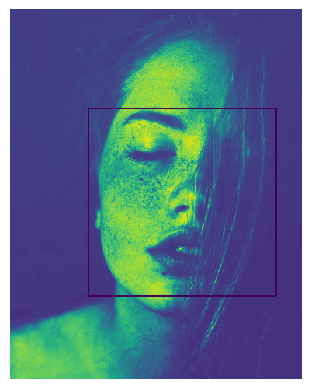

In [19]:
# https://www.clickinmoms.com/blog/wp-content/uploads/2014/10/black-and-white-portrait-of-man-with-his-eyes-closed-by-Brian-Powers.jpg
# https://i.pinimg.com/736x/a8/59/05/a85905aad4b379aafd63bbbd3144025d--freya-mavor-beautiful-people.jpg
# https://i.pinimg.com/236x/27/28/0e/27280ee28567c1e20c119f74981ee5c4--black-freckles-freckles-makeup.jpg

# Give the path of the image for face detection
detect_face(input('Enter the URL of the image: '));  # run cell and when prompted, input a URL of an img and press 'enter'!

In [20]:
# Load's dlib's pretrained face detector model
frontalface_detector = dlib.get_frontal_face_detector()
#Load the 68 face Landmark file
landmark_predictor = dlib.shape_predictor('./shape_predictor_68_face_landmarks.dat')

In [21]:
#@title Run this cell to define a helper function for Face Detection from a url


"""
Returns facial landmarks for the given input image path
"""
def get_landmarks(image_url):
  """
  :type image_url : str
  :rtype image : cv2 object
  :rtype landmarks : list of tuples where each tuple represents 
                     the x and y coordinates of facial keypoints
  """
  
  try:
    
    #Decodes image address to cv2 object
    url_response = urllib.request.urlopen(image_url)
    img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)
    image = cv2.imdecode(img_array, -1)
    
  except Exception as e:
    print ("Please check the URL and try again!")
    return None,None
  
  #Detect the Faces within the image
  faces = frontalface_detector(image, 1)
  if len(faces):
    landmarks = [(p.x, p.y) for p in landmark_predictor(image, faces[0]).parts()]
  else:
    return None,None
  
  return image,landmarks

In [22]:
#@title Run this cell to define a helper function to visualize landmarks

"""
Display image with its Facial Landmarks
"""
def plot_image_landmarks(image,face_landmarks):
  """
  :type image_path : str
  :type face_landmarks : list of tuples where each tuple represents 
                     the x and y coordinates of facial keypoints
  :rtype : None
  """
  radius = -1
  circle_thickness = 5
  image_copy = image.copy()
  for (x, y) in face_landmarks:
    cv2.circle(image_copy, (x, y), circle_thickness, (255,0,0), radius)
    
  plt.imshow(image_copy, interpolation='nearest')
  plt.axis('off')
  plt.show()
  

Enter the URL of the image: https://i.pinimg.com/736x/a8/59/05/a85905aad4b379aafd63bbbd3144025d--freya-mavor-beautiful-people.jpg


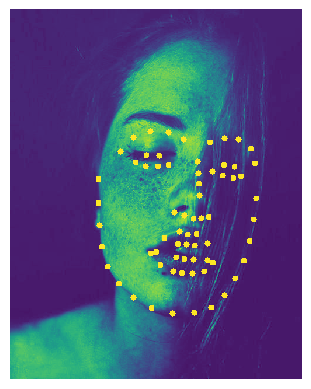

In [23]:
#Extract the Facial Landmark coordinates
image,landmarks= get_landmarks(input("Enter the URL of the image: ")) #url

#Plot the Facial Landmarks on the face
if landmarks:
  plot_image_landmarks(image,landmarks)
else:
  print ("No Landmarks Detected")

In [24]:
#@title Run (and eventually edit) this cell to visualize the features we've extracted

def show_indices(landmarks, i_index): 
  
  plt.scatter(x=[landmarks[i][0] for i in range(len(landmarks)//2, len(landmarks))], 
              y=[-landmarks[i][1] for i in range(len(landmarks)//2, len(landmarks))], s=50, alpha=.5, color='blue', label='second half of indices') 

  plt.scatter(x=[landmarks[i][0] for i in range(len(landmarks)//2)], 
              y=[-landmarks[i][1] for i in range(len(landmarks)//2)], color='red', alpha=.5, label='first half of indices')

  # what should X and Y be to visualize the feature at i_index? 
  x = landmarks[i_index][0]
  y = -landmarks[i_index][1]
  plt.scatter(x=x, y=y, 
             color='purple', s=100, marker='x', label='feature at index %d'%i_index)
  
  plt.scatter(x, y, color='red', alpha=.5, label='selected indices')

  plt.axis('off');
  plt.legend(bbox_to_anchor=[1,1]);
  plt.title('Visualizing the features we\'ve extracted from this image',y =1.2); 

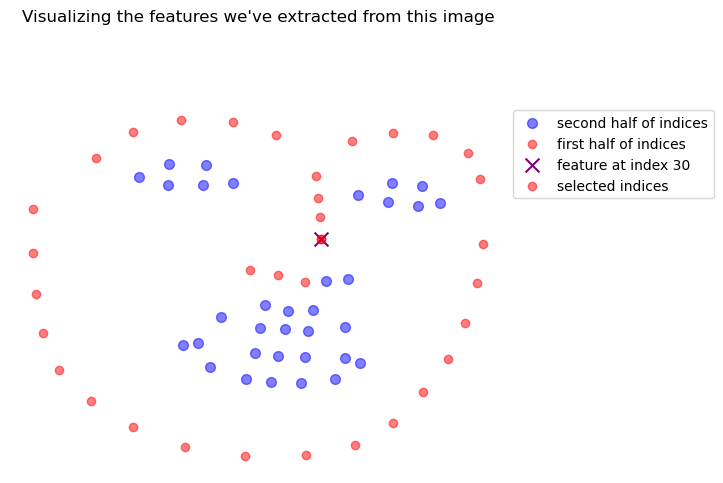

In [25]:
show_index = 30
show_indices(landmarks, show_index)

In [26]:
np.array(landmarks).shape

(68, 2)

In [27]:
landmark_indices = {'eyes':(36,47),
                    "nose":(27,35),
                    "mouth":(48,67),
                    "jawline":(0,17),
                    "eyebrow":(18,27)}


print(landmark_indices["eyes"])

(36, 47)


EYES DETECTION


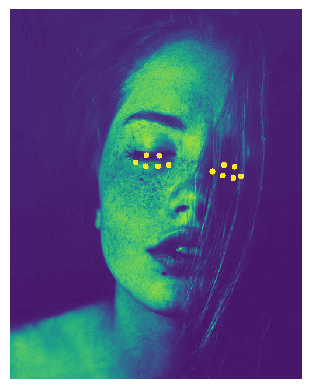

NOSE DETECTION


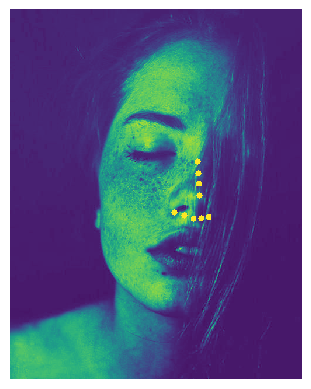

MOUTH DETECTION


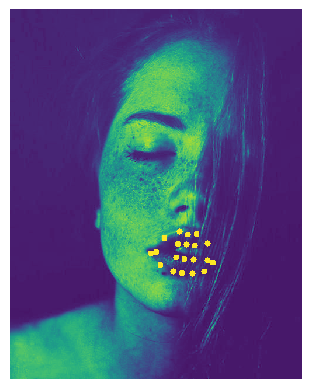

JAWLINE DETECTION


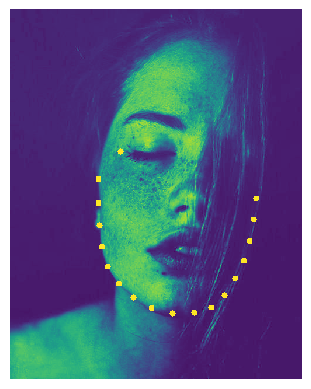

EYEBROWS DETECTION


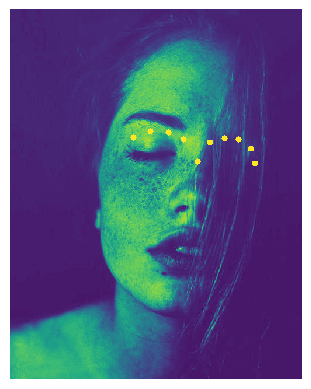

In [29]:
#@title Instructor Solution
FACIAL_LANDMARKS_IDXS = {"EYES":(36,47),
                         "NOSE":(27,35),
                         "MOUTH":(48,67),
                        "JAWLINE":(0,17),
                        "EYEBROWS":(18,27)}

for key,value in FACIAL_LANDMARKS_IDXS.items():
  print (key,"DETECTION")
  selected_landmarks = landmarks[value[0]:value[1]+1]
  plot_image_landmarks(image, selected_landmarks)

In [32]:
#@title Instructor Solution

def euclidean_distance(p1,p2):
  """
  type p1, p2 : tuple--> (x,y)
  rtype distance: float
  """
  distance =  math.sqrt((p2[0]-p1[0])**2 + (p2[1]-p1[1])**2)
  return distance


In [33]:
#@title Instructor Solution

"""
Distinguishes between two images--->closed eyes vs open eyes 
"""
def classify_images(image1_path, image2_path, plt_flag):
  """
  type image1_path,image2_path: str
  rtype : str
  """
  
  image1,image1_landmarks = get_landmarks(image1_path)
  image2,image2_landmarks = get_landmarks(image2_path)
  
  if plt_flag:
    #Plot image1
    plt.imshow(image1, interpolation='nearest')
    plt.title("Image1")
    plt.show()

    #Plot image2
    plt.imshow(image2, interpolation='nearest')
    plt.title("Image2")
    plt.show()
    
  
  # Points of interest for eyes among which distance needs to be computed
  pairs_distance = [(37,41),(38,40),(43,47),(44,46)]
  
  e_sum1 = 0
  e_sum2 = 0
  threshold_value = 10
  for pair in pairs_distance:
    
    e_sum1 = e_sum1 + euclidean_distance(image1_landmarks[pair[0]],
                                         image1_landmarks[pair[1]])
    e_sum2 = e_sum2 + euclidean_distance(image2_landmarks[pair[0]],
                                         image2_landmarks[pair[1]])
  print (e_sum1,e_sum2)
  
  e_difference = e_sum1 - e_sum2
  print (e_difference)
  if int(e_difference) == 0:
    return ("Both images have eyes open or closed")
  
  if abs(e_difference) >= threshold_value:
     
    if e_difference > 0:
        return ("Image1 : Eyes Open, Image2 : Eyes Close")
    else:
        return ("Image1 : Eyes Close, Image2 : Eyes Open")
   